# Final Project: Regression Analysis

Author: Terry Konkin  
Date: April 20, 2025  
Objective: To analyze the Housing Prices Dataset

### Imports

In [1]:
# all imports get moved to the top - import each only once
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt


### Section 1. Load and Inspect the Data

1.1 Load the dataset and display the first 10 rows.

In [2]:
# load the dataset
insurance = pd.read_csv("data/insurance.csv", sep=",")



In [12]:
# display the first 10 rows of the training set
print(insurance.head(10))


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


1.2 Check for missing values and display summary statistics.

In [13]:
# Check for missing values
insurance.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
# Display summary statistics
print(insurance.describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Reflection 1:  

What do you notice about the dataset?  
There are no missing values in the dataset.  
  
Are there any data issues?  
None.


### Section 2. Data Exploration and Preparation

2.1 Explore data patterns and distributions

Create histogram of age.

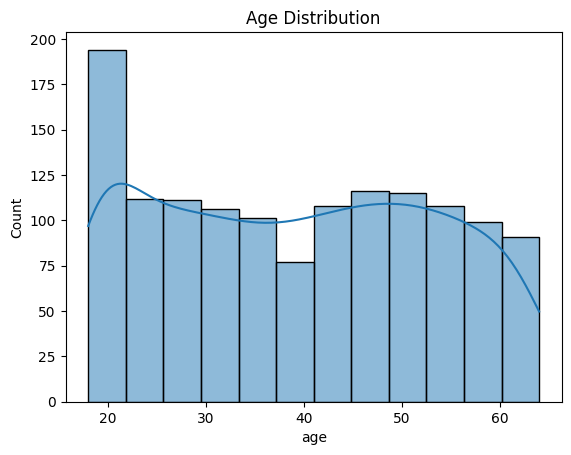

In [15]:
sns.histplot(insurance['age'], kde=True)
plt.title('Age Distribution')
plt.show()


Create count plot of children

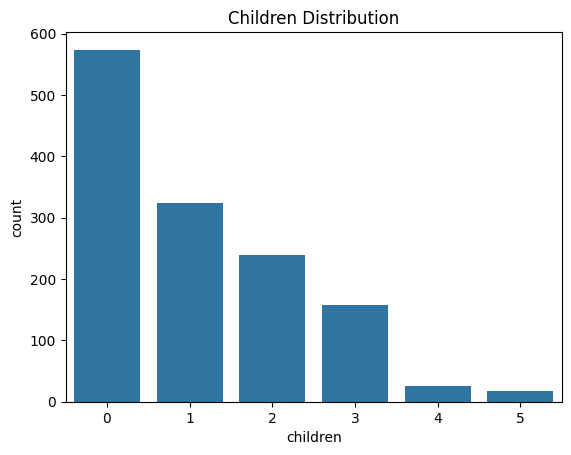

In [17]:
sns.countplot(x='children', data=insurance)
plt.title('Children Distribution')
plt.show()


Scatter matrix of age, bmi, children. 

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>]], dtype=object)

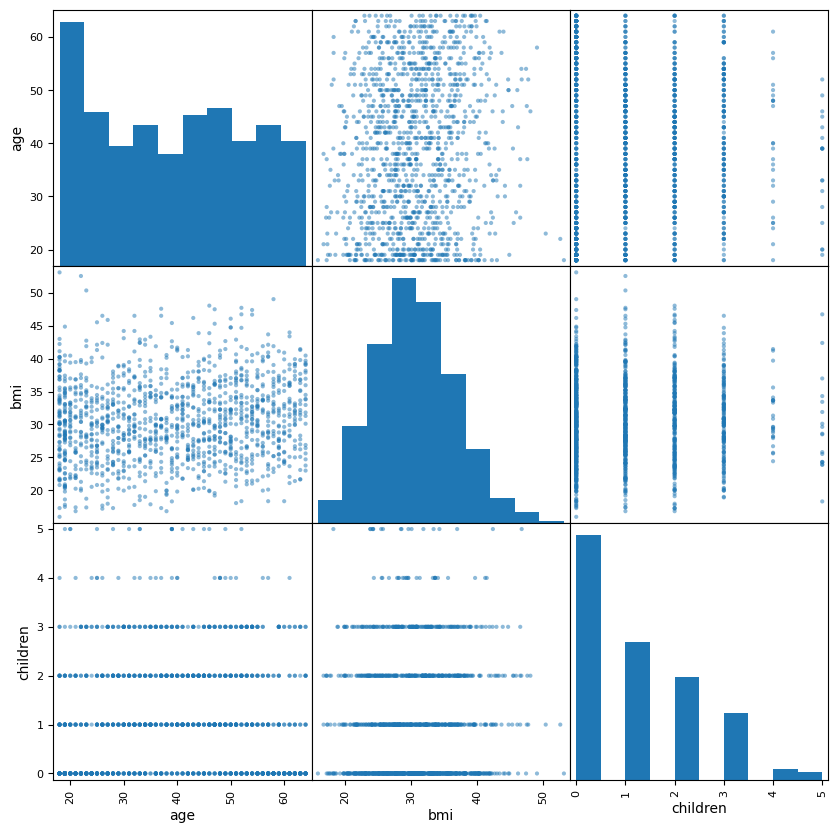

In [16]:
attributes = ['age', 'bmi', 'children']
scatter_matrix(insurance[attributes], figsize=(10, 10))


Check for class imbalance in the target variable.  
There is not a value for children that greatly outnumbers the other, so no class imbalance.  


2.2 Handle missing values and clean data

There are no missing values in the dataset. 

2.3 Feature Engineering

Convert the categorical data in smoker to numerical format.

In [3]:
insurance['smoker'] = insurance['smoker'].map({'no': 0, 'yes': 1})


Reflection 2:  
  
What patterns or anomalies do you see?  Do any features stand out?  
The count decreases steadily as number of children increases.  
The bmi scatterplot has an approximately normal distribution.   

What preprocessing steps were necessary to clean and improve the data?  
The feature smoker was transformed to numerical, for machine learning purposes.  

Did you create or modify any features to improve performance?  
No features were created or modified.

### Section 3. Feature Selection and Justification

3.1 Choose features and target

Select two or more input features: age, bmi, smoking status

Select a target variable: charges  

The input features and target were selected as outlined in the Dataset Options for the Medical Costs Dataset.

3.2 Define X and y

Create a list of the contributing features.  
Define the target feature string.  
Define the input DataFrame.  
Define the output DataFrame.

In [4]:
features: list = ['age', 'bmi', 'smoker']

target: str = 'charges'

df_X = insurance[features]

df_y = insurance[target]


Reflection 3:  
  
Why did you choose these features? How might they impact predictions or accuracy?  

age, because older customers will have a higher charge, due to increased health issues.  
bmi, because overweight csustomers will have a higher charge, due to increased health issues.  
smoker, because that population has a higher likelyhood of lung cancer. 



### Section 4. Train a Model (Linear Regression)

4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).  
  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42)


4.2 Train model using Scikit-Learn model.fit() method.

In [6]:
model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)




4.3 Evaluate Performance

In [28]:
# print("Training R²:", r2_score(y_train, y_pred_train1))
print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))



Test R²: 0.7776932310583375
Test RMSE: 5874.763304187488
Test MAE: 4260.560091099391


Reflection 4:  
  
How well did the model perform?  
R2 was relatively close to 1.0, so performed fairly well.  

Any surprises in the results?  
Historically, it was assumed that the chosen features were better predictors of charges.

### Section 5. Improve the Model or Try Alternates (Implement Pipelines)

5.1 Implement Pipeline 1: Imputer --> StandardScaler --> Linear Regression.

In [7]:
insurance_pipe = Pipeline([
('median_transform', SimpleImputer(strategy='median')),
('scale_transform', StandardScaler()),
('lin_reg', LinearRegression())])
insurance_pipe.fit(df_X,df_y)
print("The stage bias is " ,
insurance_pipe.named_steps['lin_reg'].intercept_)
print("The stage feature coefficients are ",
insurance_pipe.named_steps['lin_reg'].coef_)

print("Test R²:", r2_score(y_test, y_pred))

The stage bias is  13270.422265141258
The stage feature coefficients are  [3645.26900064 1966.63205344 9613.8847355 ]
Test R²: 0.7776932310583375


5.2 Implement Pipeline 2: Imputer --> Polynomial Features (degree=3) --> StandardScaler --> Linear Regression.

In [38]:
insurance_pipe = Pipeline([
('median_transform', SimpleImputer(strategy='median')),
('polynomial_features', PolynomialFeatures(degree=3)),
('scale_transform', StandardScaler()),
('lin_reg', LinearRegression())])
insurance_pipe.fit(df_X,df_y)
print("The stage bias is " ,
insurance_pipe.named_steps['lin_reg'].intercept_)
print("The stage feature coefficients are ",
insurance_pipe.named_steps['lin_reg'].coef_)


The stage bias is  13270.422265141147
The stage feature coefficients are  [     0.           -156.48398876 -17738.9033029   -3744.54485904
   3234.51087127   2440.40662234   -234.66064107  37322.80771937
  12654.59953825  -3744.54485904   -978.45208229   1643.23033822
  -1804.76535862  -2999.13089762   3292.8559284    -234.66064107
 -19413.03930641  -5371.7513591   12654.59953825  -3744.54485904]


Reflection 5:  
  
Which models performed better?  
Both models had the same stage bias.  
Model 5.1 is simpler, as it only has 3 coefficients.  The polynomial in 5.2 has resulted in a significantlt greater number of coefficients, which may cause overfitting.

How does scaling impact the results?  
  
The imputer likely had no effect, as there were no missing values in the dataset.  
Therefore, the polynomial is the differing factor between the two pipelines.

### Section 6. Final Thoughts & Insights

6.1 Summarize findings.  
The model without pipelines performed fairly well, with an R2 of 77%.  
Creating a pipeline did not have any significant effect on the R2 value.

6.2 Discuss challenges faced.  
Initially understanding the pipeline concept, had to re-review the lecture materials, plus AI.

6.3 If you had more time, what would you try next?  
Different combinations of pipelines, to see how they affect performance.

Reflection 6: What did you learn from this project?  
  
Learned pipelines, however did not spend enough time with it to describe as proficient.